In [1]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

def writeLog(row):
    with open('log.txt', 'a') as outfile:
        outfile.write(row + '\n')
        
def getErrMsg(e):
    error_class = e.__class__.__name__ #取得錯誤類型
    detail = e.args[0] #取得詳細內容
    errMsg = "[{}] {}".format(error_class, detail)
    return errMsg

In [4]:
# 讀取固定的類別順序
genres = read_json('../orderedListGenres.json')
print(len(genres), genres)

20 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [5]:
# 讀取電影所屬的分類
genresMat = read_json('../genresMat.json')
len(genresMat)

165

# Makedir SplitTrailers_crop/

In [7]:
PATH = './Trailers/'
TRAILER = './SplitTrailers_crop/'
newPath(TRAILER)

In [8]:
from __future__ import print_function
import scenedetect
from scenedetect.video_manager import VideoManager
from scenedetect.scene_manager import SceneManager
from scenedetect.frame_timecode import FrameTimecode
from scenedetect.stats_manager import StatsManager
from scenedetect.detectors import ContentDetector
import cv2     # for capturing videos

In [9]:
def splitScene(dic, horizontal = True):
    count = 0
    for key, v in dic.items():
        count += 1
        
        video = PATH + key + '.mp4'
        border = v
        print(count, key, border)

        savePath = TRAILER + key
        newPath(savePath)

        cap = cv2.VideoCapture(video)
        w = int(cap.get(3))
        h = int(cap.get(4))
        fps = cap.get(5)
        duration = cap.get(7)
        print(w, 'x', h, 'FPS:', fps, duration)
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        if horizontal:
            newH = h - 2*border # horizontal
        else:
            newW = w - 2*border # vertical
            
        # scenedetect
        video_manager = VideoManager([video])
        stats_manager = StatsManager()
        scene_manager = SceneManager(stats_manager)
        # Add ContentDetector algorithm (constructor takes detector options like threshold).
        scene_manager.add_detector(ContentDetector())
        base_timecode = video_manager.get_base_timecode()

        try:
            video_manager.set_duration()

            # Set downscale factor to improve processing speed (no args means default).
            video_manager.set_downscale_factor()

            # Start video_manager.
            video_manager.start()

            # Perform scene detection on video_manager.
            scene_manager.detect_scenes(frame_source=video_manager)

            # Obtain list of detected scenes.
            scene_list = scene_manager.get_scene_list(base_timecode)
            # Like FrameTimecodes, each scene in the scene_list can be sorted if the
            # list of scenes becomes unsorted.

    #         print('List of scenes obtained:')
            length = len(scene_list)
            print('Scene count:', length)
            for i, scene in enumerate(scene_list):

                scenePath = savePath + '/' + 'scene_' + str(i+1) +'/'
                newPath(scenePath)

                framePath = scenePath + 'frames/'
                newPath(framePath)
                filename = scenePath + 'clip.avi'
    #             print(filename)

                out = cv2.VideoWriter(filename, fourcc, fps, (w if horizontal else newW, 
                                                              newH if horizontal else h))

                start = scene[0].get_frames()
                end = scene[1].get_frames()

                cap.set(1,start)

                while(cap.isOpened()):

                    ret, frame = cap.read()
                    if horizontal:
                        frame = frame[border: h - border, :] # horizontal
                    else:
                        frame = frame[:, border: w - border] # vertical

                    current = int(cap.get(1))

                    if (ret == True):
                        out.write(frame)
                        cv2.imwrite(framePath + str(current) + '.jpg', frame)

                        if current == end:
                            break
                    else:
                        break

                    writeProgress('Progerss:',current, duration)
        except Exception as e:
            errMsg = getErrMsg(e)
            print(errMsg)
            writeLog(key + '\n\t' + errMsg)
            
        finally:
            video_manager.release()
            cap.release()
            out.release()

## Get horizontal and vertical dict respectively

In [10]:
dic = read_json('./json/crop_dict4Trailers.json')
print(type(dic))
dic = eval(dic)
print(type(dic))
print(len(dic))

# del dic['highlifemovie']
# print(len(dic))

<class 'str'>
<class 'dict'>
165


In [17]:
dic_v = read_json('./json/crop_dict4Trailers_vertical_2019.json')
print(type(dic_v))
dic_v = eval(dic_v)
print(type(dic_v))
print(len(dic_v))

<class 'str'>
<class 'dict'>
5


### For horizontal crop

In [11]:
splitScene(dic)

1 artofracingmovie 13
1280 x 720 FPS: 23.976023976023978 3189.0
Scene count: 99
2 hotelmumbaifilm 92
1280 x 720 FPS: 29.97002997002997 5992.0
Scene count: 44
3 lighthousemovie 0
640 x 360 FPS: 23.976023976023978 2526.0
Scene count: 3
4 littlewoodsfilm 92
1280 x 720 FPS: 23.976023976023978 3480.0
Scene count: 72
5 fightingwmyfam 92
1280 x 720 FPS: 25.0 4214.0
Scene count: 121
6 playingwithfire 14
1280 x 720 FPS: 23.976023976023978 3360.0
Scene count: 109
7 rocketmanmovie 91
1280 x 720 FPS: 23.976023976023978 3658.0
Scene count: 107
8 catsmovie 92%
1280 x 720 FPS: 23.976023976023978 3664.0
Scene count: 95
9 xmenmovies 92
1280 x 720 FPS: 23.976023976023978 2950.0
Scene count: 71
10 scarystoriesmovie 92
1280 x 720 FPS: 23.976023976023978 3823.0
Scene count: 101
11 toystory 07%
1280 x 536 FPS: 23.976023976023978 3539.0
Scene count: 95
12 brittanyrunsmov 93
1280 x 720 FPS: 23.976023976023978 3696.0
Scene count: 108
13 pomsmovie 13
1280 x 720 FPS: 23.976023976023978 3881.0
Scene count: 131
14

In [12]:
len(os.listdir(TRAILER))

165

### For vertical crop

In [18]:
splitScene(dic_v, horizontal = False)

1 lucyintheskyfilm 177
1280 x 720 FPS: 23.976023976023978 3605.0
Scene count: 92
2 highlifemovie 40
1280 x 720 FPS: 23.976023976023978 3433.0
Scene count: 79
3 lighthousemovie 103
640 x 360 FPS: 23.976023976023978 2526.0
Scene count: 3
4 thenightingalefilm 147
1280 x 720 FPS: 24.0 3680.0
Scene count: 70
5 marriagestory 32
1280 x 720 FPS: 23.976023976023978 3323.0
Scene count: 89


In [19]:
len(os.listdir(TRAILER))

165

# Check crop results

In [13]:
import random

In [14]:
originPath = './SplitTrailers/'
cropPath = './SplitTrailers_crop/'

In [15]:
lis = os.listdir(originPath)
print(len(lis))

165


In [20]:
# stripe check
lis = read_json('./json/2019stripe.json')
print(len(lis))

5


Running: 5 lucyintheskyfilm
250.jpg


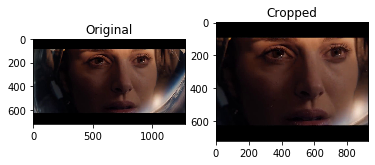

621.jpg


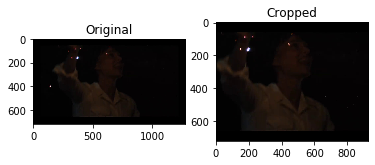

1845.jpg


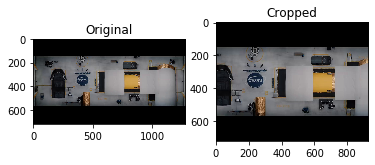

2658.jpg


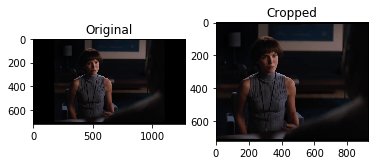

991.jpg


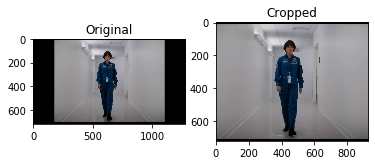

1150.jpg


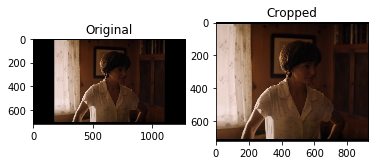

3160.jpg


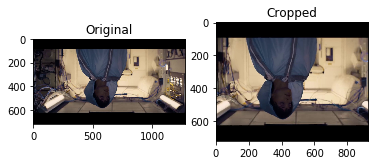

2954.jpg


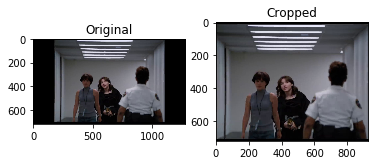

792.jpg


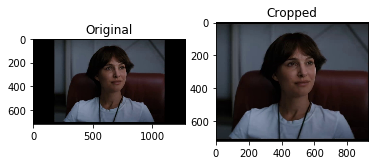

2521.jpg


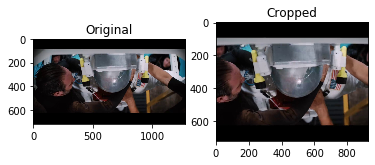

1299.jpg


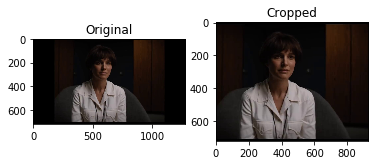

1810.jpg


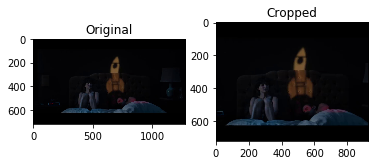

3007.jpg


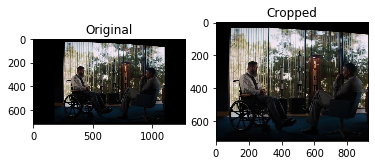

2694.jpg


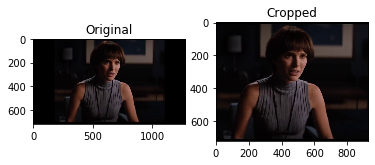

2505.jpg


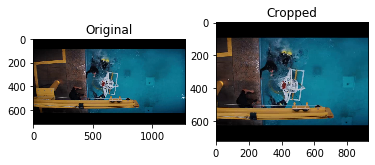

621.jpg


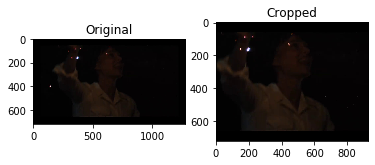

2913.jpg


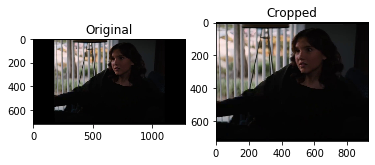

2323.jpg


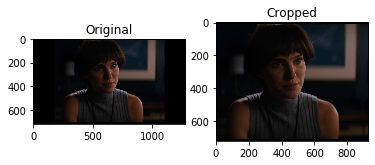

2913.jpg


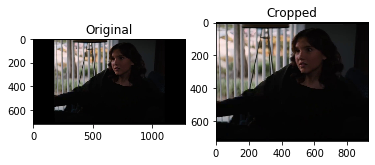

3217.jpg


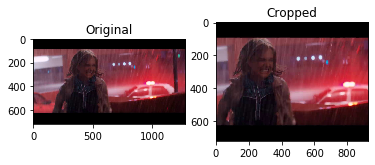

2677.jpg


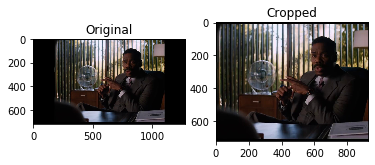

Running: 4 highlifemovie
1293.jpg


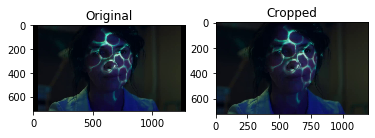

374.jpg


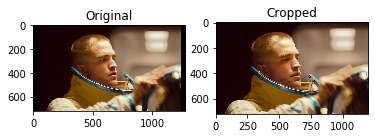

2034.jpg


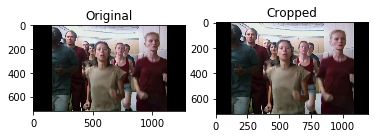

1462.jpg


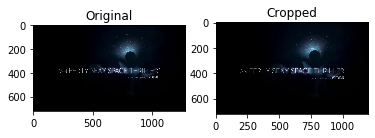

1156.jpg


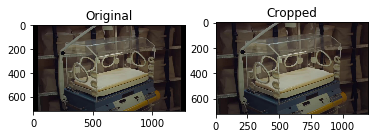

2324.jpg


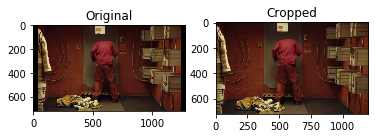

2115.jpg


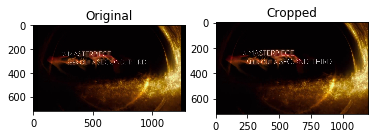

Running: 3 lighthousemovie
2030.jpg


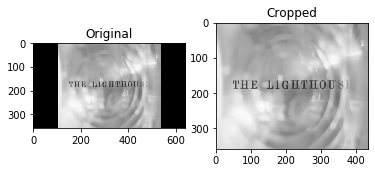

2309.jpg


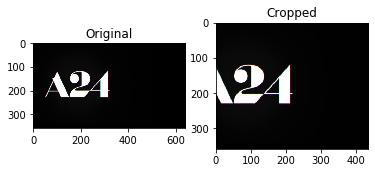

985.jpg


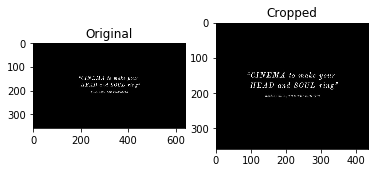

2030.jpg


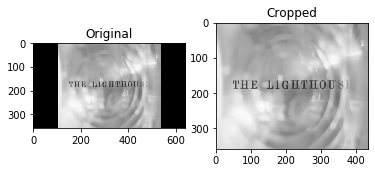

985.jpg


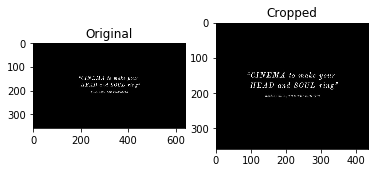

Running: 2 thenightingalefilm
2831.jpg


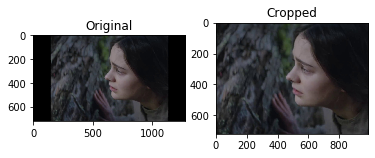

1591.jpg


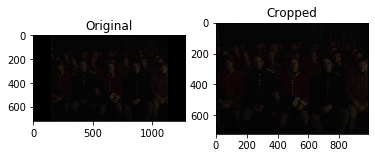

2627.jpg


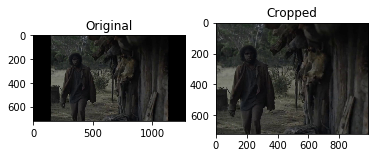

952.jpg


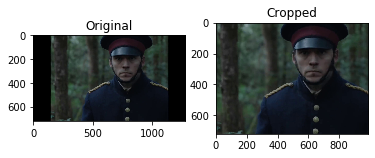

3107.jpg


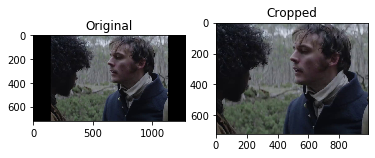

834.jpg


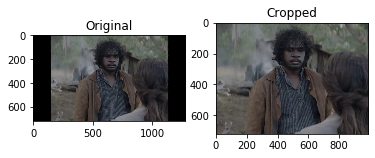

1485.jpg


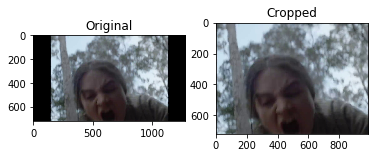

2720.jpg


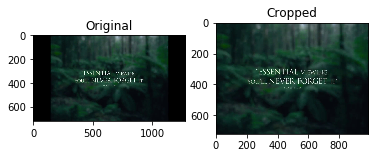

3160.jpg


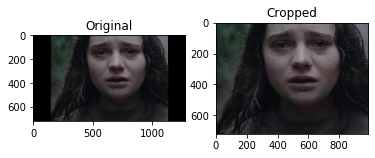

906.jpg


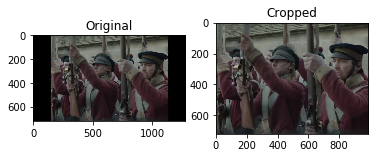

Running: 1 marriagestory
23.jpg


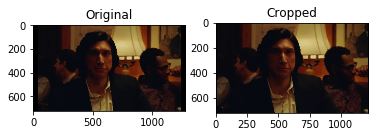

2055.jpg


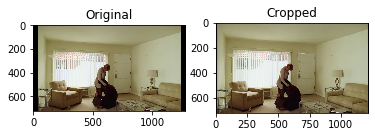

482.jpg


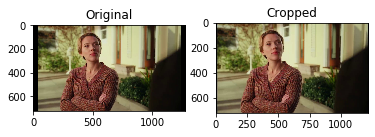

2265.jpg


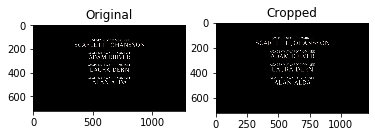

2814.jpg


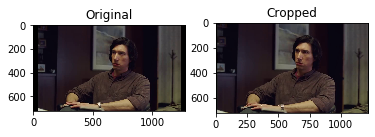

2416.jpg


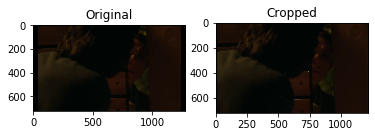

1118.jpg


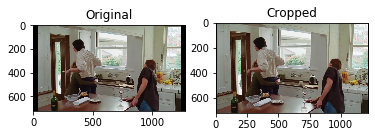

622.jpg


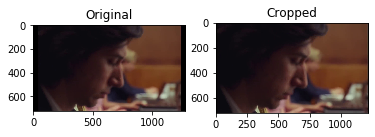

854.jpg


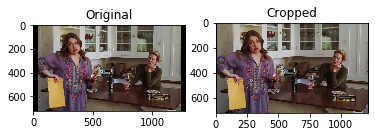

2437.jpg


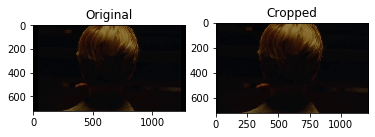

In [21]:
length = len(lis)
index = 0

for movie in lis[index:]:
    
    countdown = length - index
    print('Running:', countdown, movie)
    sceneList = os.listdir(originPath + movie)
    nxt = True
    while nxt:
        scene = random.choice(sceneList)
        framePath = originPath + movie + '/' + scene + '/frames/'
        frameList = [int(name.split('.')[0]) for name in os.listdir(framePath)]
        frameList.sort()
    #     print(frameList)
        keyframe = str(frameList[len(frameList)//2]) + '.jpg'
        print(keyframe)

        ori_img = cv2.imread(originPath + movie + '/' + scene + '/frames/' + keyframe)[:,:,::-1]
        crop_img = cv2.imread(cropPath + movie + '/' + scene + '/frames/' + keyframe)[:,:,::-1]

        plt.subplot(121).set_title("Original"), plt.imshow(ori_img)
        plt.subplot(122).set_title("Cropped"), plt.imshow(crop_img)
        plt.show()
        
        usr_input = input()
        # "Enter" to next movie, otherwise random pick another image for check
        if usr_input == '': # move forwards
            nxt = False
            index += 1